# AutoEncoder

## 1. Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.datasets import fashion_mnist

## 2. Image Datasets Loading

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train = X_train / 255
X_test = X_test / 255

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

- It consists of 60,000 data, and the size is (28, 28), and since there is no channel, it is a grayscale image.

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

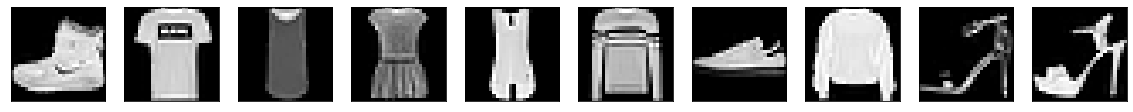

In [ ]:
plt.figure(figsize=(20, 5))

for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## 3. Build and Train the Autoencoder

In [ ]:
autoencoder = Sequential()

# Encode
autoencoder.add(Flatten())
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) # Encoded image (Latent Vector)

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))
autoencoder.add(Reshape((28, 28)))

- Made with Linear AutoEncoder, but better performance with CNN structure

In [ ]:
autoencoder.build((None, 28, 28))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1

In [ ]:
autoencoder.compile(optimizer='Adam', loss=MeanSquaredError(), metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, shuffle=True, epochs=50, validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 15s 4ms/step - loss: 0.0265 - accuracy: 0.0930 - val_loss: 0.0186 - val_accuracy: 0.1089
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0168 - accuracy: 0.1188 - val_loss: 0.0157 - val_accuracy: 0.1270
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0149 - accuracy: 0.1348 - val_loss: 0.0143 - val_accuracy: 0.1407
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0139 - accuracy: 0.1454 - val_loss: 0.0135 - val_accuracy: 0.1487
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.1522 - val_loss: 0.0129 - val_accuracy: 0.1591
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.1590 - val_loss: 0.0125 - val_accuracy: 0.1564
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - accuracy: 0.1642 - val_loss: 0.0121 - val_accuracy

## 4. Encoding the images

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'flatten_input')>

In [ ]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (InputLayer)  [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


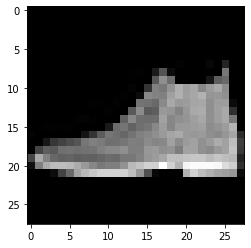

In [ ]:
plt.imshow(X_test[0], cmap='gray');

In [ ]:
encoded_image = encoder.predict(X_test[0].reshape(-1, 28, 28))

1/1 [==============================] - 0s 102ms/step


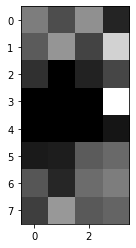

In [ ]:
plt.imshow(encoded_image.reshape(8, 4), cmap='gray');

## 5. Decoding the images

In [ ]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.get_layer('dense_3')
decoder_layer2 = autoencoder.get_layer('dense_4')
decoder_layer3 = autoencoder.get_layer('dense_5')
decoder_layer4 = autoencoder.get_layer('reshape')
decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder)))))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 65ms/step


In [ ]:
decoded_image.shape

(1, 28, 28)

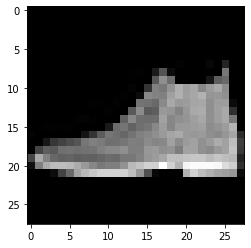

In [ ]:
plt.imshow(X_test[0], cmap='gray');

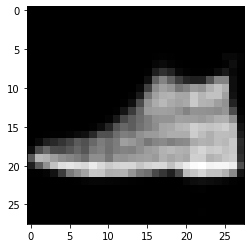

In [ ]:
plt.imshow(decoded_image.reshape(28, 28), cmap='gray');

## 6. Visualize Original-Ecoded-Reconstructed Images

1/1 [==============================] - 0s 22ms/step


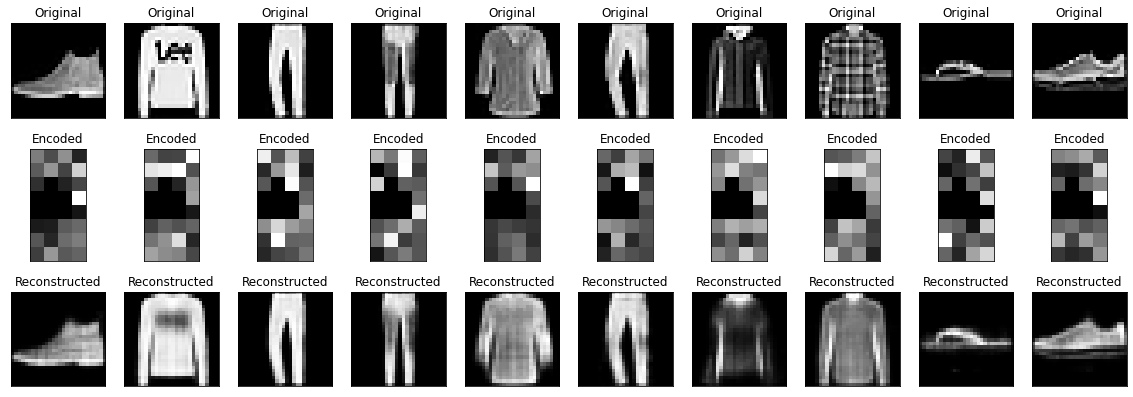

In [ ]:
num_of_images = 10

plt.figure(figsize=(20, 7))
for i in range(num_of_images):
    # Origianl images
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, 10, i+1+num_of_images)
    encoded_image = encoder.predict(X_test[i].reshape(-1, 28, 28))
    plt.imshow(encoded_image.reshape(8, 4), cmap='gray')
    plt.title("Encoded")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decoded images
    ax = plt.subplot(3, 10, i+1+2*num_of_images)
    decoded_image = decoder.predict(encoded_image)
    plt.imshow(decoded_image.reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)